<a href="https://colab.research.google.com/github/jaishruti/Influence-Maximization/blob/main/Influence_Maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading dataset and forming graph

Number of nodes:  34
Number of edges:  154


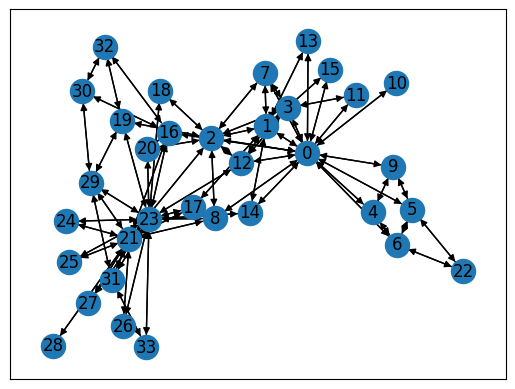

In [ ]:
import networkx as nx

#specifying path to edge list file
path_dataset = 'sample_data/testcolab.txt'

#reading edge-list for graph formation
graph = nx.read_edgelist(path_dataset, create_using = nx.DiGraph(), nodetype=str)

count_nodes = graph.number_of_nodes()
count_edges = graph.number_of_edges()
#displaying graph info
print("Number of nodes: ", count_nodes)
print("Number of edges: ", count_edges)

#visualising graph
nx.draw_networkx(graph)

#print all nodes of graph

In [ ]:
#using list comphrehension
nodes = [node for node in graph.nodes()]

#contains list of nodes
print(nodes)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33']


#finding degree centrality of each node

In [ ]:
#finding degree centrality (inbound neighbours)
def in_degree_centrality(graph):
    N = count_nodes
    centrality = [0] * N
    
    for u in nodes:
        for v in graph.predecessors(u):
            index = int(v)
            centrality[index] += 1
    
    return centrality

#invoking in degree function
degree_centrality = in_degree_centrality(graph)
print(degree_centrality)

[16, 9, 10, 6, 3, 4, 4, 4, 5, 3, 1, 2, 5, 2, 3, 2, 6, 4, 2, 4, 3, 12, 2, 16, 2, 2, 2, 2, 1, 5, 3, 4, 3, 2]


#Finding shortest path using BFS from node u to v

In [ ]:
from collections import deque

def bfs_shortest_path(graph, start, end):
    # Create an empty queue and visited set
    queue = deque([start])
    visited = set([start])
    # Create a dictionary to keep track of the node from which each node is reached
    parents = {start: None}

    # BFS algorithm
    while queue:
        node = queue.popleft()
        if node == end:
            # Reconstruct the shortest path from the end node to the start node
            path = []
            while node:
                path.append(node)
                node = parents[node]
            path.reverse()
            return path
        for neighbor in graph.neighbors(str(node)):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                parents[neighbor] = node
    
    # If the end node is not found, return None
    return None

shortest_path = bfs_shortest_path(graph, 0, 2)
print(shortest_path)

None


#Finding betweeness centrality: 
how many times each node appears in shortest-path from node u to node v